Measurement results: {'0011': 31, '0000': 453, '1011': 41, '0010': 29, '1010': 52, '0111': 37, '0101': 44, '0100': 27, '1101': 41, '1000': 35, '1111': 45, '0110': 36, '1110': 44, '1100': 34, '1001': 30, '0001': 21}


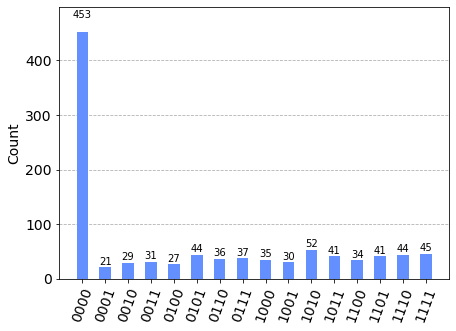

In [31]:
# Import necessary modules from Qiskit
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram
import numpy as np

# Define the number of qubits and number of marked states
n = 4
num_marked = 3

# Define the quantum circuit
qc = QuantumCircuit(n, n)

# Initialize the qubits to equal superposition
qc.h(range(n))

# Define the number of iterations to perform
num_iterations = int((np.pi/4)*np.sqrt(2**n/num_marked))

# Apply the Grover operator for the specified number of iterations
for i in range(num_iterations):
    # Apply the oracle that marks the desired states
    for j in range(n):
        qc.x(j)
    qc.h(n-1)
    qc.mct(list(range(n-1)), n-1)
    qc.h(n-1)
    for j in range(n):
        qc.x(j)
    # Apply the diffusion operator
    qc.h(range(n))
    qc.x(range(n))
    qc.h(n-1)
    qc.mct(list(range(n-1)), n-1)
    qc.h(n-1)
    qc.x(range(n))
    qc.h(range(n))

# Measure the qubits
qc.measure(range(n), range(n))

# Run the circuit on a simulator
simulator = Aer.get_backend('qasm_simulator')
result = execute(qc, backend=simulator, shots=1000).result()
counts = result.get_counts(qc)

# Print the results
print("Measurement results:", counts)
plot_histogram(counts)
